In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error as mse
import numpy as np
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [3]:
df = pd.read_csv('solarpowergeneration.csv')
df.shape

(2920, 13)

In [4]:
df.columns

Index(['month', 'day', 'first-hour-period', 'distance-to-solar-noon',
       'temperature', 'wind-direction', 'wind-speed', 'sky-cover',
       'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [5]:
df.dropna(inplace=True)
df.shape

(2919, 13)

In [6]:
X=df.iloc[:,:12]
Y=df.iloc[:,12:]

In [7]:
X.describe().round(decimals=2).iloc[1:]

,month,day,first-hour-period,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
mean,6.52,15.72,11.50,0.50,58.47,24.96,10.10,1.99,9.56,73.51,10.13,30.02
std,3.45,8.80,6.88,0.30,6.84,6.91,4.84,1.41,1.38,15.07,7.26,0.14
min,1.00,1.00,1.00,0.05,42.00,1.00,1.10,0.00,0.00,14.00,0.00,29.48
25%,4.00,8.00,5.50,0.23,53.00,25.00,6.60,1.00,10.00,65.00,5.00,29.92
50%,7.00,16.00,13.00,0.48,59.00,27.00,10.00,2.00,10.00,77.00,9.00,30.00
75%,10.00,23.00,17.50,0.74,63.00,29.00,13.10,3.00,10.00,84.00,15.00,30.11
max,12.00,31.00,22.00,1.14,78.00,36.00,26.60,4.00,10.00,100.00,40.00,30.53


In [8]:
Y=np.array(Y)
count=[0,0,0]
for i in range(len(Y)):
    if Y[i]>20000:
        Y[i]=2
        count[0]+=1
    elif Y[i]>1000:
        Y[i]=1
        count[1]+=1
    else:
        Y[i]=0
        count[2]+=1

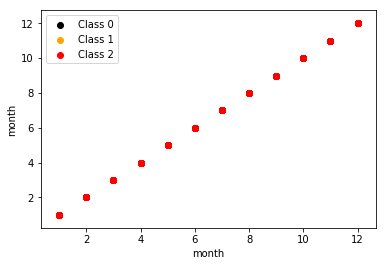

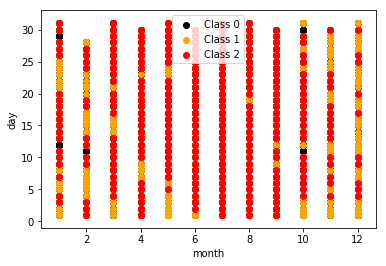

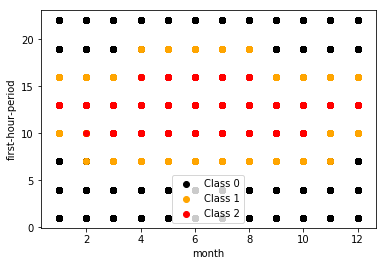

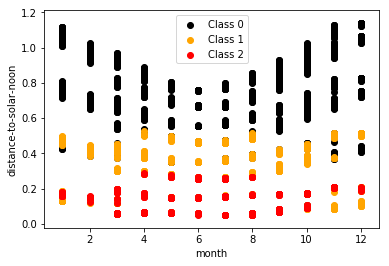

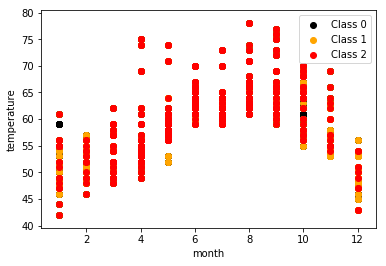

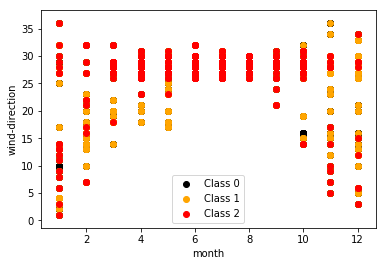

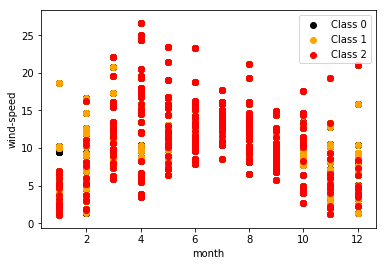

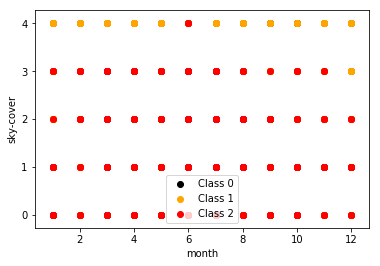

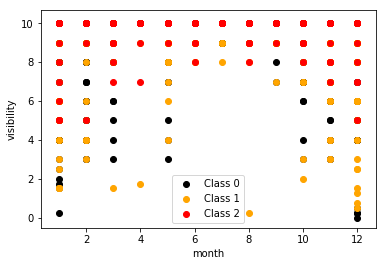

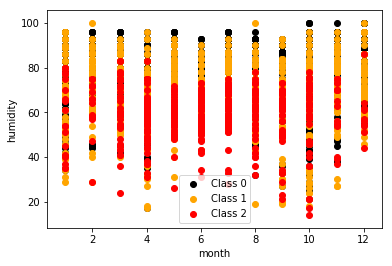

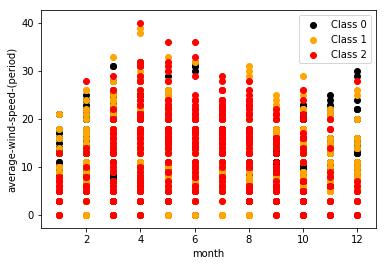

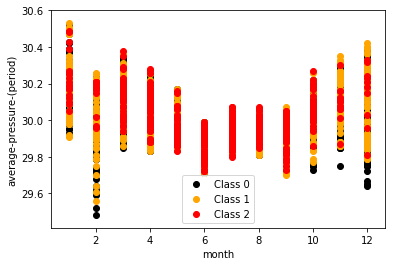

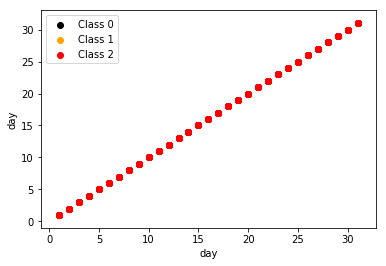

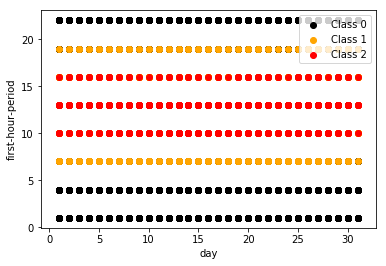

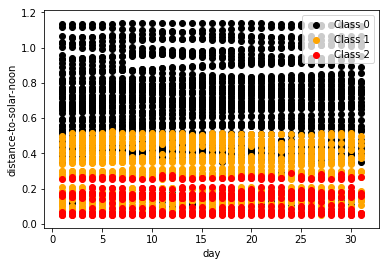

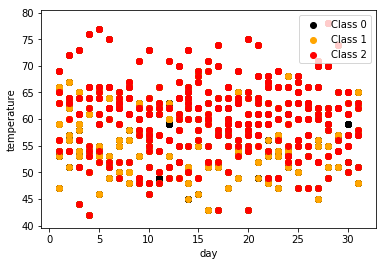

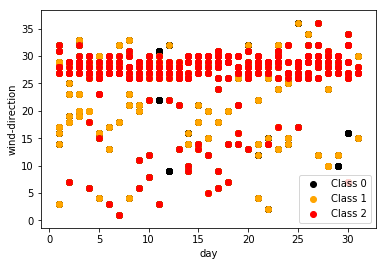

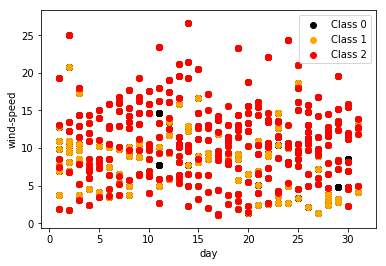

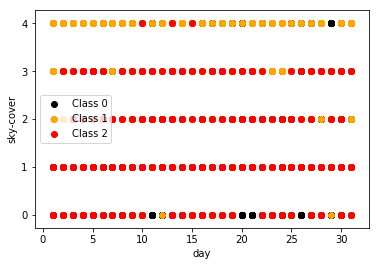

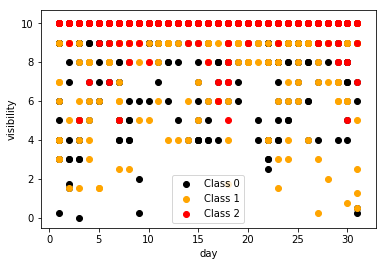

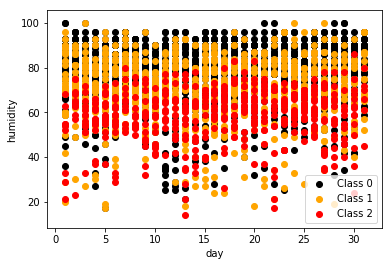

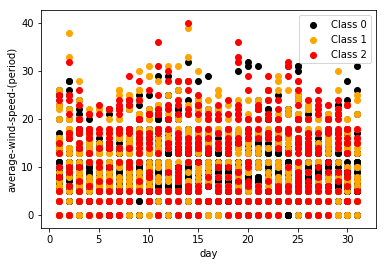

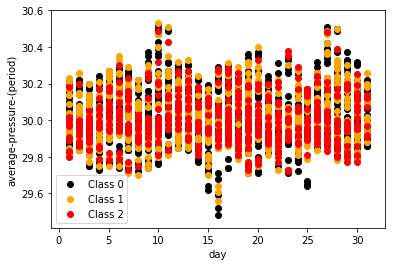

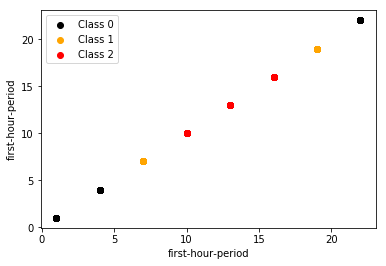

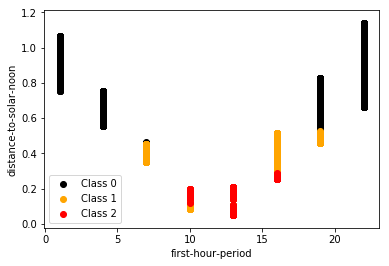

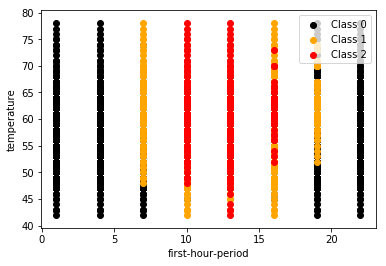

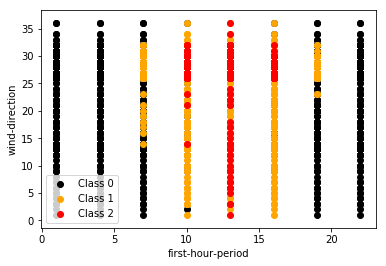

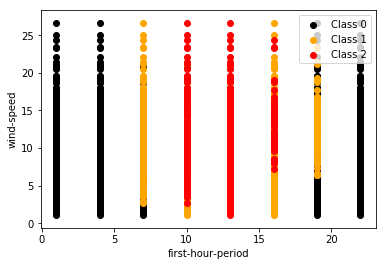

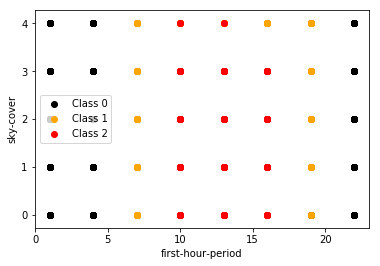

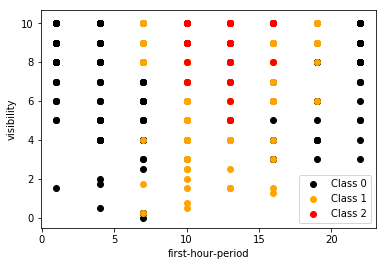

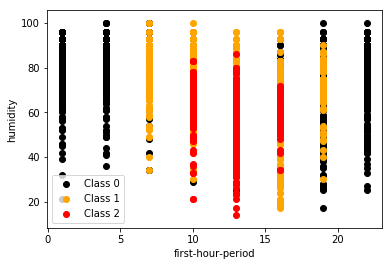

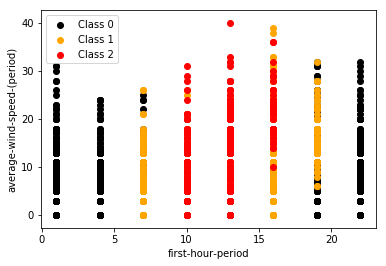

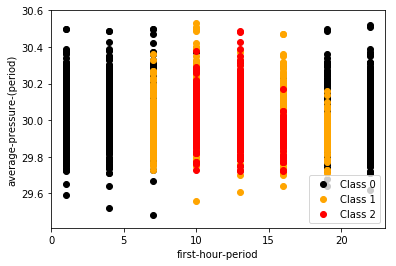

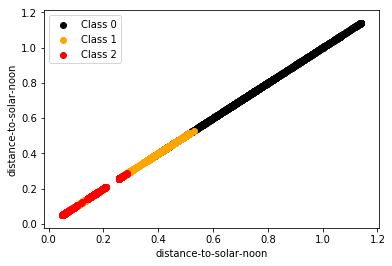

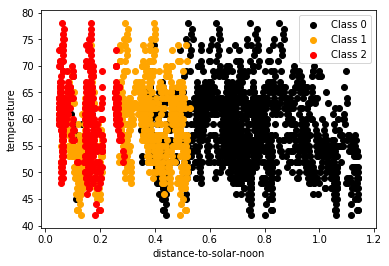

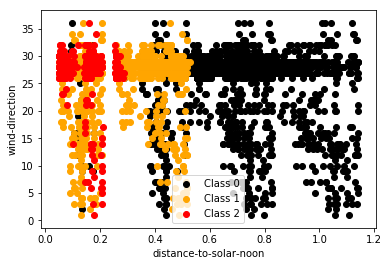

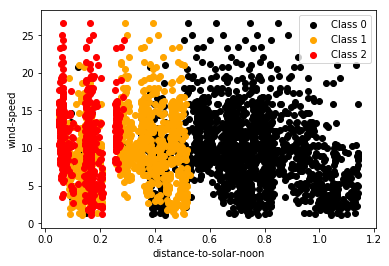

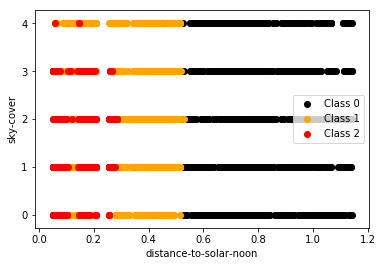

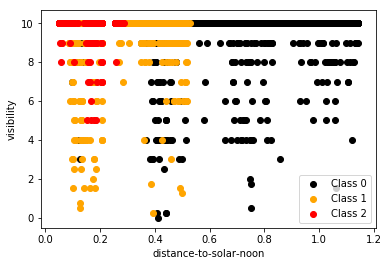

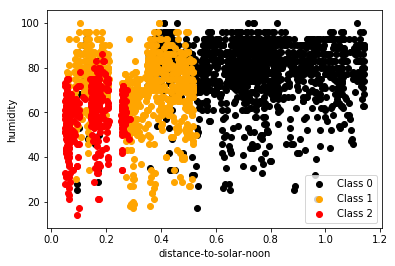

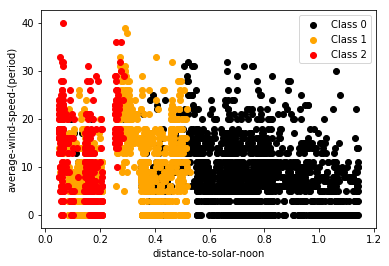

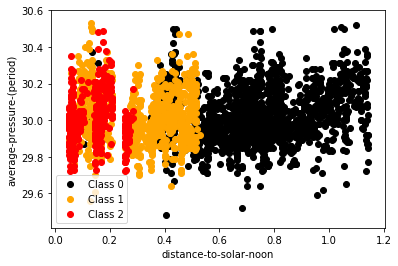

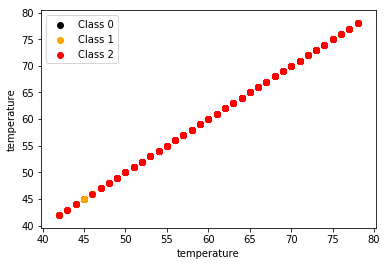

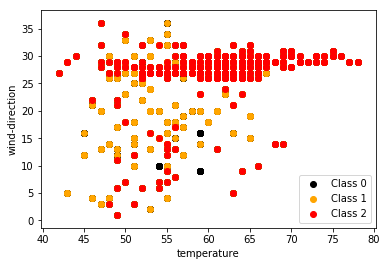

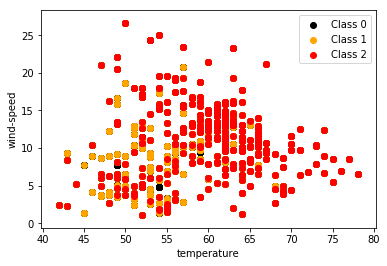

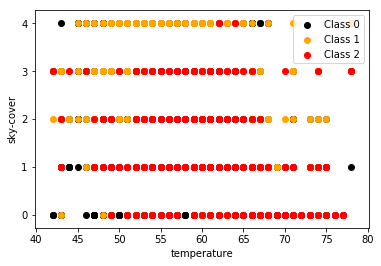

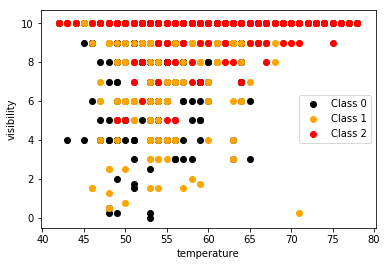

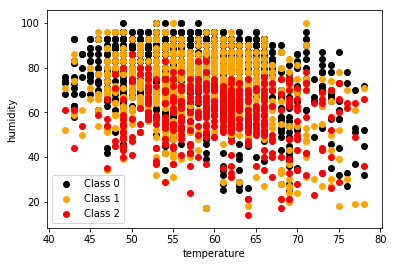

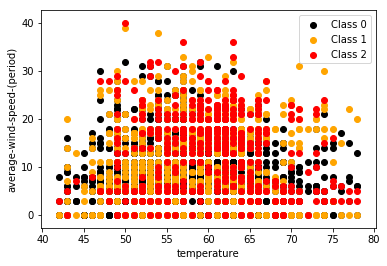

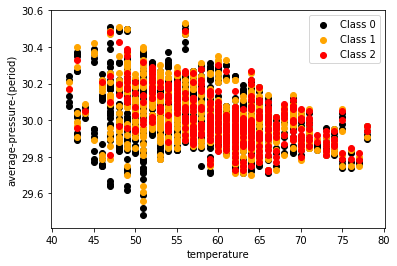

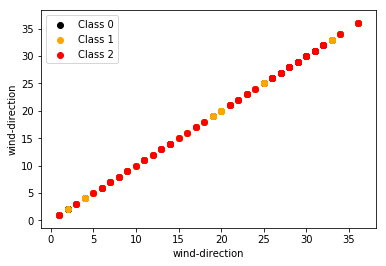

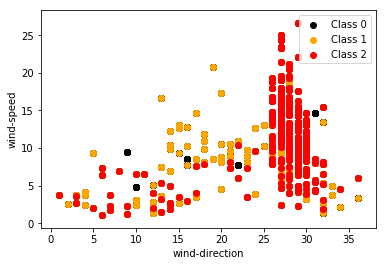

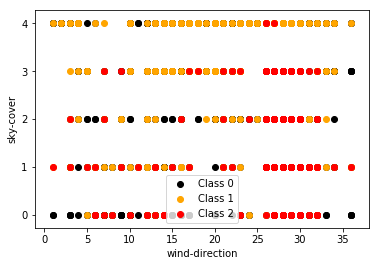

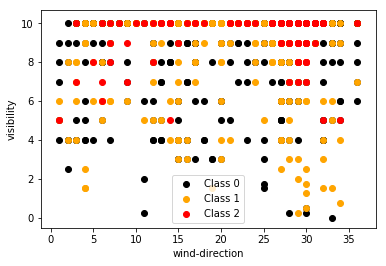

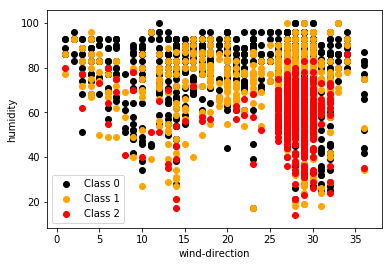

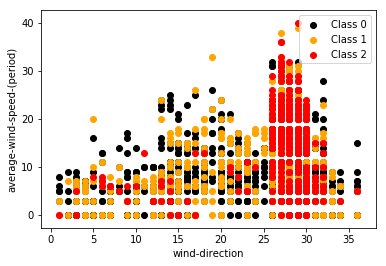

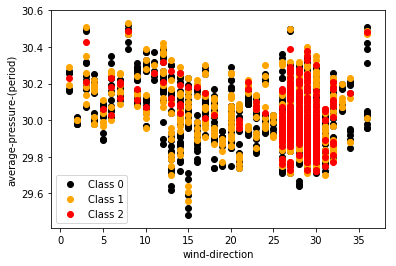

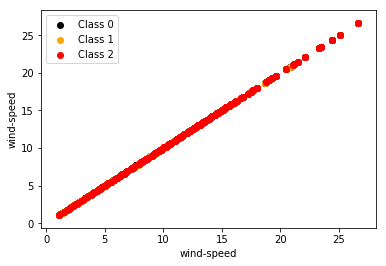

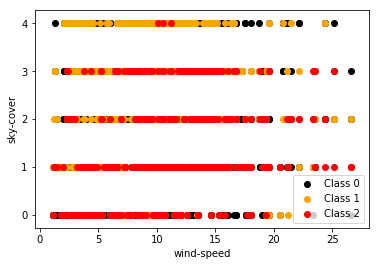

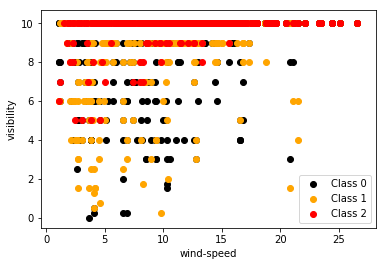

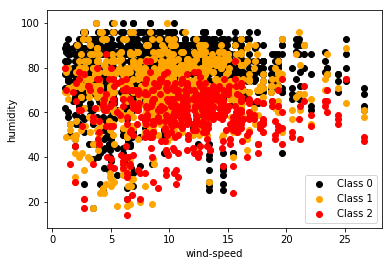

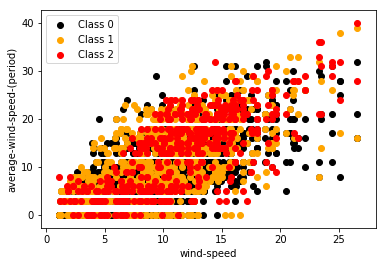

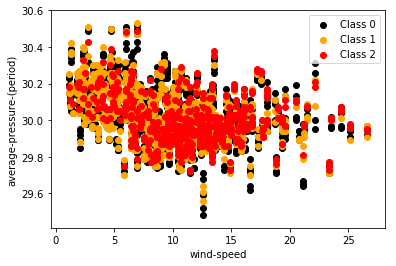

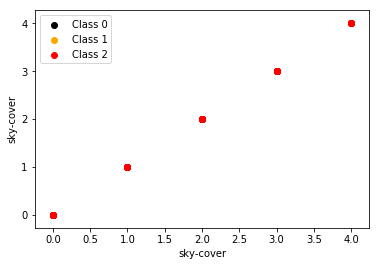

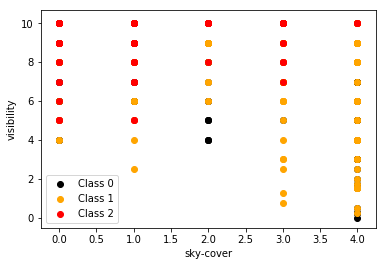

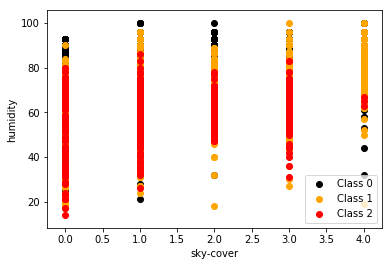

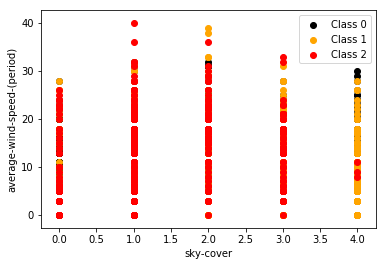

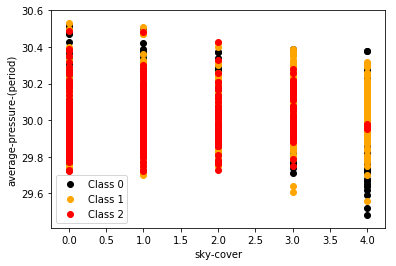

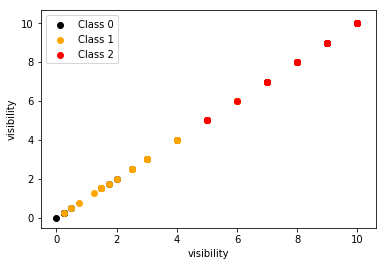

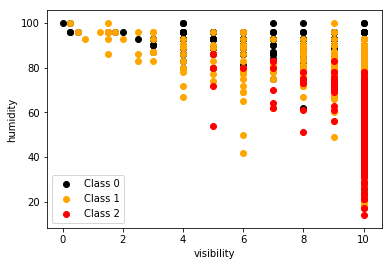

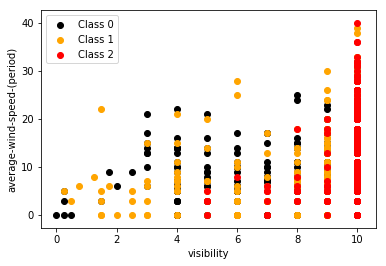

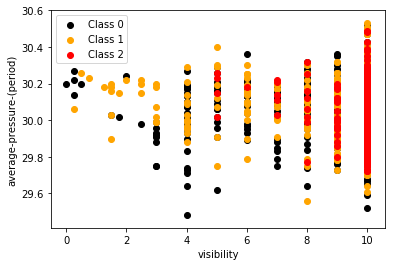

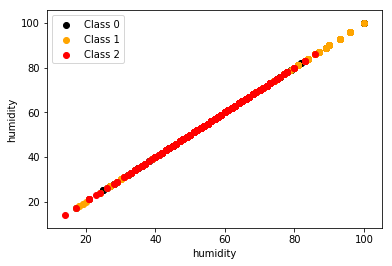

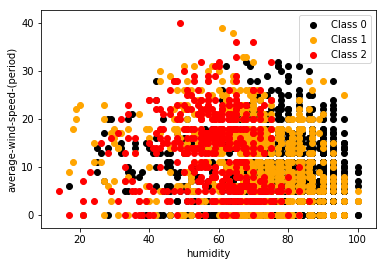

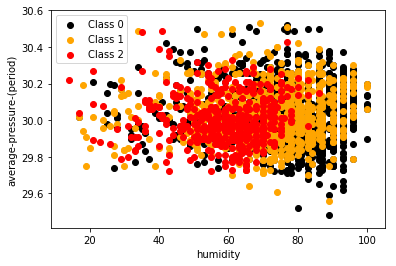

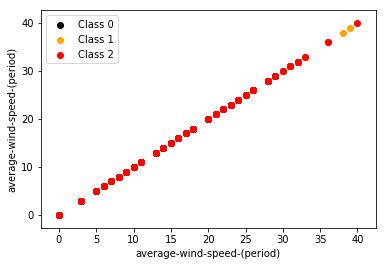

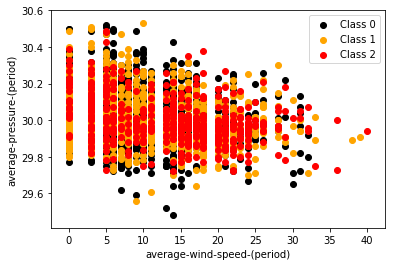

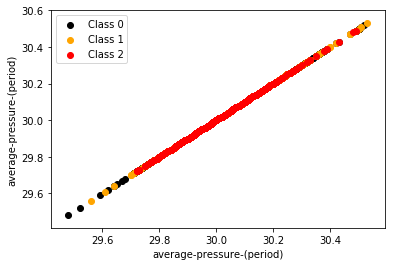

In [13]:
for i in range(12):
    for j in range(i,12):
        plt.scatter((X[Y==0])[[i]],(X[Y==0])[[j]],color='black',MarkerStyle='0')
        plt.scatter((X[Y==1])[[i]],(X[Y==1])[[j]],color='orange',MarkerStyle='0')
        plt.scatter((X[Y==2])[[i]],(X[Y==2])[[j]],color='red')
        plt.ylabel(X.columns[j])
        plt.xlabel(X.columns[i])
        #plt.legend(['Class 0 :  power generated < 1KW','Class 1: 1KW < power generated < 20KW','Class 2:  power generated > 20 KW',])
        plt.legend(['Class 0','Class 1','Class 2'])  
        plt.show()

In [9]:
X=(X-X.mean())/X.max()

In [10]:
X.describe().round(decimals=2).iloc[1:]

,month,day,first-hour-period,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
mean,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,0.29,0.28,0.31,0.26,0.09,0.19,0.18,0.35,0.14,0.15,0.18,0.00
min,-0.46,-0.47,-0.48,-0.40,-0.21,-0.67,-0.34,-0.50,-0.96,-0.60,-0.25,-0.02
25%,-0.21,-0.25,-0.27,-0.24,-0.07,0.00,-0.13,-0.25,0.04,-0.09,-0.13,-0.00
50%,0.04,0.01,0.07,-0.02,0.01,0.06,-0.00,0.00,0.04,0.03,-0.03,-0.00
75%,0.29,0.23,0.27,0.21,0.06,0.11,0.11,0.25,0.04,0.10,0.12,0.00
max,0.46,0.49,0.48,0.56,0.25,0.31,0.62,0.50,0.04,0.26,0.75,0.02


In [11]:
count

[478, 862, 1579]

In [13]:
Y=np.array(Y).reshape(-1)

In [14]:
from sklearn.metrics import accuracy_score as acc

In [18]:
trainer=[]
tester=[]
for i in range(10,60,10):
    max=10000000
    X1=X
    X2=X**2
    X3=X**3
    X4=X**4
    X5=X**5
    frames=[X1,X2,X3,X4,X5]
    X_ex=pd.concat(frames,axis=1)
    train_X, test_X, train_Y, test_Y = train_test_split(X_ex, Y,test_size=0.15, random_state=41)
    print('Hidden Layers: [',i,',',i//2,',','5 ]')
    model=MLPClassifier(hidden_layer_sizes=(i,i//2,5),max_iter=3000,learning_rate_init=0.01,activation='relu',solver='adam')
    model.fit(train_X,train_Y)
    train_p=model.predict(train_X)
    ac1=acc(train_p,train_Y)
    test_p=model.predict(test_X)
    ac2=acc(test_p,test_Y)
    trainer.append(ac1)
    tester.append(ac2)
    print('Train accuracy:','%.2f'%ac1,'\tCross-validation accuracy:','%.2f'%ac2,'\n')

Hidden Layers: [ 10 , 5 , 5 ]
Train accuracy: 0.94 	Cross-validation accuracy: 0.91 

Hidden Layers: [ 20 , 10 , 5 ]
Train accuracy: 0.96 	Cross-validation accuracy: 0.91 

Hidden Layers: [ 30 , 15 , 5 ]
Train accuracy: 0.97 	Cross-validation accuracy: 0.90 

Hidden Layers: [ 40 , 20 , 5 ]
Train accuracy: 0.94 	Cross-validation accuracy: 0.90 

Hidden Layers: [ 50 , 25 , 5 ]
Train accuracy: 0.97 	Cross-validation accuracy: 0.90 



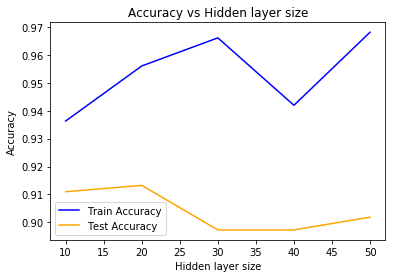

In [20]:
plt.plot(range(10,60,10),trainer,color='blue')
plt.plot(range(10,60,10),tester,color='orange')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Hidden layer size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden layer size')
plt.show()

In [16]:
model=MLPClassifier(hidden_layer_sizes=(20,5,5),max_iter=3000,learning_rate_init=0.01,activation='relu',solver='adam')
model.fit(train_X,train_Y)
p=model.predict(test_X)
c=confusion_matrix(test_Y,p)
a=acc(test_Y,p)
print('%.2f'%a,'\n',c)

0.91 
 [[231   8   2]
 [ 11 102  13]
 [  0   6  65]]


Text(0.5, 1.0, 'For Training set')

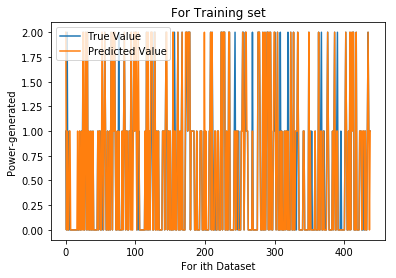

In [21]:
plt.plot(test_Y)
plt.plot(model.predict(test_X))
plt.legend(['True Value','Predicted Value'])
plt.xlabel('For ith Dataset')
plt.ylabel('Power-generated')
plt.title('For Training set')

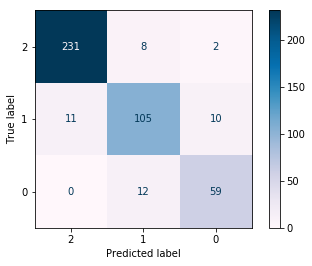

In [18]:
plot_confusion_matrix(model,test_X,test_Y,normalize=None,display_labels=(2,1,0),cmap='PuBu',values_format='.0f')

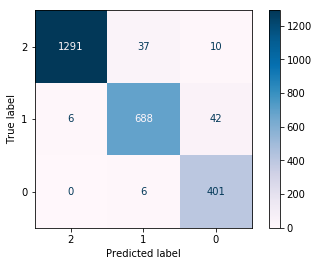

In [81]:
plot_confusion_matrix(model,train_X,train_Y,normalize=None,display_labels=(2,1,0),cmap='PuBu',values_format='.0f')